In [1]:
import yfinance as yf
import pandas as pd
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import cvxpy as cp
import numpy as np

# Use 30 actively traded stocks in health care sector


In [2]:
import yfinance as yf
import pandas as pd

# List of technology stock tickers
stocks = [
    'JNJ', 'PFE', 'UNH', 'MRK', 'ABBV', 'TMO', 'ABT', 'AMGN', 'DHR', 'LLY',
    'BMY', 'GILD', 'CI', 'CVS', 'MOH', 'ISRG', 'SYK', 'BDX', 'REGN', 'ZTS',
    'VRTX', 'BIIB', 'HUM', 'IDXX', 'ILMN', 'EW', 'IQV', 'ALGN', 'HCA', 'CNC'
]

# List to store DataFrames for each stock
stock_dataframes = []

# Download adjusted close price data for each stock and store in DataFrame
for stock in stocks:
    print(f"Downloading data for {stock}...")
    stock_data = yf.download(stock, start='2015-01-01')

    # Select only the "Adj Close" column and rename it with the stock ticker
    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': stock})

    # Append DataFrame to list
    stock_dataframes.append(stock_data)

# Concatenate DataFrames into a single DataFrame
stock_prices = pd.concat(stock_dataframes, axis=1)
print(stock_prices.head())

if stock_prices.isnull().any().any():
    print("NaN values found in the dataset")
else:
    print("No NaN values found in the dataset")


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

                  JNJ        PFE        UNH        MRK       ABBV         TMO  \
Date                                                                            
2015-01-02  81.205582  20.950953  87.571014  41.064388  44.314438  124.615570   
2015-01-05  80.638420  20.837267  86.128593  41.674721  43.480473  122.903725   
2015-01-06  80.242157  21.011129  85.954788  43.311840  43.265255  121.756004   
2015-01-07  82.013603  21.298681  86.832420  44.238110  45.013885  125.403397   
2015-01-08  82.658463  21.733358  90.977203  45.128479  45.484676  126.706772   

                  ABT        AMGN        DHR        LLY  ...        VRTX  \
Date                                                     ...               
2015-01-02  37.481438  122.898537  54.973156  58.082390  ...  123.070000   
2015-01-05  37.489788  121.438179  54.428040  57.510361  ...  121.029999   
2015-01-06  37.064049  117.525742  54.056080  57.800510  ...  117.360001   
2015-01-07  37.364559  121.630333  54.383148  57.394

# C=1 no short

Step 1: Calculate the Covariance Matrix using data of past three years 2021-01-05 to 2024-01-31

In [3]:
# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Filter the data for the desired date range
filtered_data = stock_prices.loc[start_date:end_date] #2021-01-04 to 2024-01-31

# Calculate returns
returns = filtered_data.pct_change().dropna()   #773 rows

# Compute covariance matrix
cov_matrix = returns.cov()
print(cov_matrix.head())

           JNJ       PFE       UNH       MRK      ABBV       TMO       ABT  \
JNJ   0.000103  0.000064  0.000054  0.000060  0.000058  0.000044  0.000061   
PFE   0.000064  0.000256  0.000059  0.000060  0.000072  0.000081  0.000061   
UNH   0.000054  0.000059  0.000189  0.000064  0.000064  0.000073  0.000060   
MRK   0.000060  0.000060  0.000064  0.000171  0.000066  0.000064  0.000052   
ABBV  0.000058  0.000072  0.000064  0.000066  0.000168  0.000050  0.000061   

          AMGN       DHR       LLY  ...      VRTX      BIIB       HUM  \
JNJ   0.000064  0.000046  0.000073  ...  0.000055  0.000052  0.000045   
PFE   0.000056  0.000089  0.000088  ...  0.000051  0.000065  0.000056   
UNH   0.000055  0.000079  0.000083  ...  0.000069  0.000060  0.000174   
MRK   0.000061  0.000049  0.000088  ...  0.000073  0.000066  0.000061   
ABBV  0.000071  0.000057  0.000080  ...  0.000060  0.000067  0.000051   

          IDXX      ILMN        EW       IQV      ALGN       HCA       CNC  
JNJ   0.000043 

Step 2: Retrieve the recent three month realized stocks returns

In [4]:
#As if we hold the portfolio for 3 months Feb Mar Apr
start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 4, 30)

# Calculate returns for February to April 2024
specific_months_returns = stock_prices.loc[start_date:end_date].pct_change().dropna() # 61rows and 30 columns
print(specific_months_returns.head())

                 JNJ       PFE       UNH       MRK      ABBV       TMO  \
Date                                                                     
2024-02-02 -0.011051 -0.013192  0.006093  0.000237  0.006444 -0.000742   
2024-02-05 -0.005172 -0.013368 -0.014249 -0.001820  0.015355 -0.000362   
2024-02-06  0.014506  0.035002  0.015329  0.005548  0.011853  0.015699   
2024-02-07 -0.000506  0.002182  0.017076  0.004650  0.009926 -0.014225   
2024-02-08 -0.010001  0.000363  0.001348 -0.006747 -0.001257 -0.002571   

                 ABT      AMGN       DHR       LLY  ...      VRTX      BIIB  \
Date                                                ...                       
2024-02-02 -0.020788 -0.004221  0.004895  0.010932  ... -0.021181 -0.016584   
2024-02-05 -0.004103 -0.003775 -0.002070  0.057740  ...  0.009913 -0.007714   
2024-02-06  0.021048 -0.018325  0.009682 -0.001657  ... -0.029751  0.015341   
2024-02-07 -0.006053 -0.063910 -0.006285  0.028864  ...  0.007089 -0.020403   
2024-02

Step 3: Set up the Markowitz Portfolio Optimization Problem

In [6]:
# Assuming 'returns' is a pandas DataFrame of asset returns
num_assets = 30
expected_returns = returns.mean().values

# Optimization variables
weights = cp.Variable(num_assets)

# Portfolio return
portfolio_return = weights.T @ expected_returns

# Portfolio variance
portfolio_variance = cp.quad_form(weights, cov_matrix)

# Define your risk tolerance
risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights is 1
    weights >= 0,          # Weights are non-negative
    portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
]

# Objective function to maximize expected return
objective = cp.Maximize(portfolio_return)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Output optimized weights and portfolio statistics
optimized_weights = weights.value
optimized_return = portfolio_return.value
optimized_variance = portfolio_variance.value

print("Optimized Weights:", optimized_weights)

Optimized Weights: [9.50295105e-10 1.84433521e-10 3.00101916e-02 1.60048084e-01
 1.75814853e-01 4.77053491e-10 3.72329360e-10 6.07774570e-02
 9.59654146e-10 2.45657968e-01 1.92875255e-10 4.32083977e-02
 4.66212328e-02 4.14106843e-10 2.17975774e-02 5.55317532e-10
 4.92226807e-02 3.73454119e-10 5.68043907e-02 3.16757213e-10
 3.41987807e-02 1.04411099e-10 2.70344703e-10 2.72693335e-10
 6.08555066e-11 1.90908667e-10 4.14125238e-10 1.43836135e-10
 7.58383800e-02 2.87358809e-10]


In [7]:
growth_rate = 1+specific_months_returns
daily_returns = growth_rate.dot(optimized_weights)
print(daily_returns.shape)
quarter_return = np.prod(daily_returns)
quarter_return


(61,)


1.0259135032568454

In [8]:
print("A Quarter Realized Return is:", quarter_return-1)
print("SD of Daily Portfolio Returns",np.std(daily_returns, ddof=1))

A Quarter Realized Return is: 0.025913503256845383
SD of Daily Portfolio Returns 0.007374145642739852


In [9]:
# Given data
quarter_return
daily_sd = np.std(daily_returns, ddof=1)

# Annualize the returns and standard deviation
annualized_return = quarter_return ** 4 -1
annualized_sd = daily_sd * np.sqrt(252)

# Assume a risk-free rate of 5%
risk_free_rate = 0.05

# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

print("Annualized Return:", annualized_return)
print("Annualized Standard Deviation:", annualized_sd)
print("Sharpe Ratio:", sharpe_ratio)
print("Max weight is", np.max(optimized_weights))


Annualized Return: 0.10775312652896529
Annualized Standard Deviation: 0.11706093301356121
Sharpe Ratio: 0.4933595268907923
Max weight is 0.24565796810238977


# C = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10, float('inf')])

In [11]:
c_values= np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])
# float('inf')
print(c_values)
Realizedreturn = []
Sharpe =[]
SD = []
Max = []

for i in c_values:
  num_assets = 30
  expected_returns = returns.mean().values

  # Optimization variables
  weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
  weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

  # Portfolio return
  portfolio_return = (weights_pos - weights_neg).T @ expected_returns

  # Portfolio variance
  portfolio_variance = cp.quad_form(weights_pos - weights_neg, cov_matrix)

  # Define your risk tolerance
  risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

  # Constraints
  constraints = [
      cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
      cp.sum(weights_pos) + cp.sum(weights_neg) == i,  # Sum of absolute values of weights is 1.5
      portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
  ]

  # Objective function to maximize expected return
  objective = cp.Maximize(portfolio_return)

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # Solve the problem
  problem.solve()

  # Output optimized weights and portfolio statistics
  optimized_weights = (weights_pos - weights_neg).value

  # Given data
  #growth_rate = 1+specific_months_returns
  daily_returns = growth_rate.dot(optimized_weights)
  quarter_return = np.prod(daily_returns) # this compares to
  daily_sd = np.std(daily_returns, ddof=1)

  # Annualize the returns and standard deviation
  annualized_return = quarter_return ** 4 -1
  annualized_sd = daily_sd * np.sqrt(252)

  # Assume a risk-free rate of 5%
  risk_free_rate = 0.05

  # Calculate the Sharpe Ratio
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

  Realizedreturn.append(annualized_return*100)
  Sharpe.append(sharpe_ratio)
  SD.append(daily_sd*100)
  Max.append(np.max(optimized_weights))






[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.  10. ]


In [12]:
print(Realizedreturn)
print(len(Realizedreturn))

[10.775311525177479, 12.400856518630787, 14.161067434353502, 14.16043464734309, 14.160417116925483, 14.160437299388429, 14.160357655139034, 14.16051779686347, 14.16049441144236, 14.159989776279215, 14.160202045835657, 14.160463947065782, 14.16047673443861, 14.159701468660613]
14


In [ ]:
print(SD)
print(len(SD))

[1.8573352456842551, 2.401494747479508, 3.0315385460926176, 3.703894636675394, 4.399205407138783, 5.10810573447462, 5.8256367676804555, 6.548962225231045, 7.182533860294393, 7.551962370559015, 7.946662833297485, 8.389635644770847, 8.720269092854247, 9.566808851572656]
14


# Factor - model covariance

In [13]:
from google.colab import files
uploaded = files.upload()

Saving 5_Factors.CSV to 5_Factors.CSV


In [14]:

# Load the data, skipping the first two rows to ignore the introductory text
df = pd.read_csv('5_Factors.CSV', skiprows=2)

# Display the first few rows and the column names to confirm the structure
print(df.head())
print(df.columns)





   Unnamed: 0  Mkt-RF   SMB   HML   RMW   CMA     RF
0    19630701   -0.67  0.02 -0.35  0.03  0.13  0.012
1    19630702    0.79 -0.28  0.28 -0.08 -0.21  0.012
2    19630703    0.63 -0.18 -0.10  0.13 -0.25  0.012
3    19630705    0.40  0.09 -0.28  0.07 -0.30  0.012
4    19630708   -0.63  0.07 -0.20 -0.27  0.06  0.012
Index(['Unnamed: 0', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'], dtype='object')


In [15]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'], format='%Y%m%d')
df.set_index('Unnamed: 0', inplace=True)
# Filter the data to match the date
df = df[(df.index >= pd.Timestamp('2021-01-01')) & (df.index <= pd.Timestamp('2024-01-31'))]
print(df) # 774 rows

            Mkt-RF   SMB   HML   RMW   CMA     RF
Unnamed: 0                                       
2021-01-04   -1.41  0.16  0.58 -0.64  0.10  0.000
2021-01-05    0.86  1.32  0.49  0.36  0.55  0.000
2021-01-06    0.79  3.15  3.94  0.06  0.53  0.000
2021-01-07    1.76  0.02 -0.83 -1.50 -0.20  0.000
2021-01-08    0.51 -1.01 -1.37 -0.43 -0.37  0.000
...            ...   ...   ...   ...   ...    ...
2024-01-25    0.46  0.20  0.56 -0.19  0.55  0.022
2024-01-26   -0.02  0.35 -0.27  0.22 -0.02  0.022
2024-01-29    0.86  0.89 -0.59 -1.13 -0.31  0.022
2024-01-30   -0.13 -0.96  0.84  1.00  0.13  0.022
2024-01-31   -1.74 -0.89 -0.30 -0.21  0.37  0.022

[774 rows x 6 columns]


In [16]:
# Merge the stock prices with the factors on date
returns.index = pd.to_datetime(returns.index)
df.index = pd.to_datetime(df.index)
data = pd.concat([returns, df], axis=1).dropna()  # 773 Rows  2021-01-05 - 2024-01-30
data

,JNJ,PFE,UNH,MRK,ABBV,TMO,ABT,AMGN,DHR,LLY,...,IQV,ALGN,HCA,CNC,Mkt-RF,SMB,HML,RMW,CMA,RF
2021-01-05,0.011757,0.010323,-0.013448,0.001729,0.010341,0.012505,0.012373,0.004853,0.024817,0.004955,...,0.015515,0.032652,0.008372,-0.016428,0.86,1.32,0.49,0.36,0.55,0.000
2021-01-06,0.009410,-0.008604,0.041966,0.015783,-0.008638,0.015679,-0.002082,0.024104,0.033134,-0.012025,...,0.038530,-0.005997,0.033634,0.107909,0.79,3.15,3.94,0.06,0.53,0.000
2021-01-07,0.003379,0.005153,0.016033,0.019908,0.010703,0.031162,0.009707,0.003301,0.014216,0.009189,...,0.009718,0.033254,0.017824,0.030890,1.76,0.02,-0.83,-1.50,-0.20,0.000
2021-01-08,-0.002058,0.001889,-0.004493,-0.011783,0.005248,0.023924,0.002785,0.019101,0.015769,0.003498,...,0.016059,0.021796,-0.007604,-0.022079,0.51,-1.01,-1.37,-0.43,-0.37,0.000
2021-01-11,-0.004187,0.017237,-0.007265,0.023726,0.016314,0.002049,-0.006899,-0.003858,0.002587,0.117361,...,0.001884,-0.023645,-0.005282,0.006891,-0.51,0.54,1.26,-0.17,0.45,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.003774,-0.015765,-0.038638,0.010515,0.005541,-0.003296,0.015167,0.015581,-0.005337,-0.009595,...,0.012307,0.019605,0.025419,-0.025570,0.46,0.20,0.56,-0.19,0.55,0.022
2024-01-26,-0.000376,0.000000,0.019862,0.005744,-0.004421,0.016945,-0.003913,0.004867,0.024671,0.018530,...,0.002738,0.008279,-0.009055,0.002991,-0.02,0.35,-0.27,0.22,-0.02,0.022
2024-01-29,-0.000878,0.000364,0.002663,0.003807,-0.002980,0.019074,0.012856,0.005389,0.003991,0.008995,...,0.008932,0.023119,0.011643,0.003931,0.86,0.89,-0.59,-1.13,-0.31,0.022
2024-01-30,-0.003702,-0.016739,-0.001843,0.003133,0.006162,0.016763,0.000265,0.003733,0.047108,-0.000031,...,-0.004312,-0.020896,0.051826,0.010802,-0.13,-0.96,0.84,1.00,0.13,0.022


In [17]:
factors = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

# Convert these to numeric if not already
factors = factors.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values that might have been introduced
factors = factors.dropna()

# Calculate the covariance matrix
factor_covariance_matrix = factors.cov()

# Display the covariance matrix
print(factor_covariance_matrix)

          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.337839  0.200752 -0.439214 -0.295037 -0.338805
SMB     0.200752  0.541250  0.104861 -0.215985 -0.001800
HML    -0.439214  0.104861  1.109992  0.323820  0.494091
RMW    -0.295037 -0.215985  0.323820  0.510852  0.178210
CMA    -0.338805 -0.001800  0.494091  0.178210  0.397571


Step 2: Run the linear regression

In [21]:
'''
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
from datetime import datetime

# List of technology stock tickers
stocks = [
    'JNJ', 'PFE', 'UNH', 'MRK', 'ABBV', 'TMO', 'ABT', 'AMGN', 'DHR', 'LLY',
    'BMY', 'GILD', 'CI', 'CVS', 'MOH', 'ISRG', 'SYK', 'BDX', 'REGN', 'ZTS',
    'VRTX', 'BIIB', 'HUM', 'IDXX', 'ILMN', 'EW', 'IQV', 'ALGN', 'HCA', 'CNC'
]

# Download adjusted close price data for each stock and store in DataFrame
stock_dataframes = []
for stock in stocks:
    print(f"Downloading data for {stock}...")
    stock_data = yf.download(stock, start='2015-01-01')
    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': stock})
    stock_dataframes.append(stock_data)

# Concatenate DataFrames into a single DataFrame
stock_prices = pd.concat(stock_dataframes, axis=1)

# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Filter the data for the desired date range
filtered_data = stock_prices.loc[start_date:end_date]

# Calculate returns
returns = filtered_data.pct_change().dropna()

'''
import statsmodels.api as sm
#Run linear regression
factor_levels = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].dropna()

# Dictionary to hold regression results
regressions = {}
for stock in stocks:
    y = returns[stock].dropna()
    X = factor_levels.loc[y.index]  # Align the index of factors with the stock returns
    X = sm.add_constant(X)  # Add constant term to the model
    model = sm.OLS(y, X)
    results = model.fit()
    regressions[stock] = {
        'params': results.params,
        'resid': results.resid,
        'predict': results.predict()
    }

# Extract beta coefficients for each stock into a DataFrame
betas_dict = {}
for stock, values in regressions.items():
    params = values['params']
    if isinstance(params, pd.Series):
        betas_dict[stock] = params.values
    else:
        betas_dict[stock] = params.iloc[:, 0].values

betas = pd.DataFrame(betas_dict, index=['const', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']).T
print("Beta Coefficients:")
print(betas)

# Calculate the covariance matrix of factor levels (excluding the intercept)
factor_cov_matrix = factor_levels.cov()

# Calculate idiosyncratic variance (variance of residuals)
idiosyncratic_var = {stock: regressions[stock]['resid'].var() for stock in stocks}

# Asset covariance matrix calculation using factor model
# Initialize an empty DataFrame
asset_cov_matrix = pd.DataFrame(index=stocks, columns=stocks)

# Populate the asset covariance matrix
for stock_i in stocks:
    for stock_j in stocks:
        beta_i = regressions[stock_i]['params'].drop('const').values  # Exclude intercept
        beta_j = regressions[stock_j]['params'].drop('const').values  # Exclude intercept
        if stock_i == stock_j:
            # Diagonal elements: Variance from factors + idiosyncratic variance
            asset_cov_matrix.loc[stock_i, stock_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_i)) + idiosyncratic_var[stock_i]
        else:
            # Off-diagonal elements: Covariance from factors only
            asset_cov_matrix.loc[stock_i, stock_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_j))

print("Asset Covariance Matrix:")
print(asset_cov_matrix)


Beta Coefficients:
         const    Mkt-RF       SMB       HML       RMW       CMA
JNJ  -0.000165  0.004448 -0.001869 -0.000797  0.002712  0.004469
PFE  -0.000446  0.005231 -0.002840 -0.000373  0.001403  0.004635
UNH   0.000213  0.006573 -0.003825 -0.000019  0.001982  0.004228
MRK   0.000475  0.004070 -0.002455  0.000007  0.000900  0.005138
ABBV  0.000487  0.005019 -0.002627  0.000032  0.001018  0.005036
TMO   0.000140  0.008272 -0.001777 -0.002540  0.000270  0.000612
ABT  -0.000019  0.007377 -0.002096 -0.003052  0.000458  0.004778
AMGN  0.000287  0.005346 -0.000211 -0.001149  0.002490  0.005528
DHR   0.000216  0.008529 -0.001312 -0.001873  0.000838 -0.001015
LLY   0.001651  0.006057 -0.002726 -0.003526  0.002538  0.006883
BMY  -0.000347  0.004211 -0.000742 -0.000783  0.000491  0.005759
GILD  0.000280  0.005792 -0.000567 -0.000999  0.001262  0.005675
CI    0.000166  0.007795 -0.003130  0.002743  0.000750  0.004898
CVS  -0.000211  0.007292 -0.002273  0.003717  0.000849  0.002974
MOH   

In [22]:
import pandas as pd

# Assuming regressions dictionary contains regression results for each ETF
# Extract beta coefficients for each ETF into a DataFrame
betas = pd.DataFrame({stock: values['params'] for stock, values in regressions.items()})

# Optionally, if you're using Jupyter Notebook, simply write 'betas' without print() for a nicer format:
betas


,JNJ,PFE,UNH,MRK,ABBV,TMO,ABT,AMGN,DHR,LLY,...,VRTX,BIIB,HUM,IDXX,ILMN,EW,IQV,ALGN,HCA,CNC
const,-0.000165,-0.000446,0.000213,0.000475,0.000487,0.000140,-0.000019,0.000287,0.000216,0.001651,...,0.000731,0.000237,-0.000267,0.000258,-0.000614,-0.000021,0.000117,-0.000254,0.000456,0.000057
Mkt-RF,0.004448,0.005231,0.006573,0.004070,0.005019,0.008272,0.007377,0.005346,0.008529,0.006057,...,0.006615,0.007040,0.005452,0.010368,0.010847,0.008351,0.010310,0.012551,0.010537,0.006568
SMB,-0.001869,-0.002840,-0.003825,-0.002455,-0.002627,-0.001777,-0.002096,-0.000211,-0.001312,-0.002726,...,-0.001753,0.003195,-0.002599,0.002136,0.003108,-0.000211,0.001336,0.007644,0.001825,-0.002760
HML,-0.000797,-0.000373,-0.000019,0.000007,0.000032,-0.002540,-0.003052,-0.001149,-0.001873,-0.003526,...,-0.003325,-0.003208,-0.000352,-0.006479,-0.006304,-0.004523,-0.000435,-0.005191,0.000386,0.003059
RMW,0.002712,0.001403,0.001982,0.000900,0.001018,0.000270,0.000458,0.002490,0.000838,0.002538,...,-0.000080,-0.001073,0.001673,0.001047,-0.006869,-0.001260,0.000928,0.000619,0.004373,-0.001086
CMA,0.004469,0.004635,0.004228,0.005138,0.005036,0.000612,0.004778,0.005528,-0.001015,0.006883,...,0.007508,0.005070,0.004248,0.000010,0.004496,0.002654,-0.002168,-0.006562,0.003895,0.001839


Step 3: Compute the Covariance matrix using
$$\Sigma_{R} = \beta^{T} \Sigma_{F} \beta + \Sigma_{\sigma}$$

In [24]:
c_values= np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])
# float('inf')
print(c_values)
Realizedreturn_f = []
Sharpe_f =[]
SD_f = []
Max_f = []


for i in c_values:
  expected_returns = returns.mean().values

  # Optimization variables
  num_assets = 30
  # Optimization variables
  weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
  weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

  # Portfolio return
  portfolio_return = (weights_pos - weights_neg).T @ expected_returns

  # Portfolio variance
  portfolio_variance = cp.quad_form(weights_pos - weights_neg, asset_cov_matrix)

  # Define your risk tolerance
  risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

  # Constraints
  constraints = [
      cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
      cp.sum(weights_pos) + cp.sum(weights_neg) == i,  # Sum of absolute values of weights is 2
      portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
  ]
  # Objective function to maximize expected return
  objective = cp.Maximize(portfolio_return)

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # Solve the problem
  problem.solve()

  # Output optimized weights and portfolio statistics
  optimized_weights = (weights_pos - weights_neg).value
  optimized_return = portfolio_return.value
  optimized_variance = portfolio_variance.value

  #print("Optimized Weights:", optimized_weights)
  growth_rate = 1+specific_months_returns
  daily_returns = growth_rate.dot(optimized_weights)
  quarter_return = np.prod(daily_returns)
  # Given data
  quarter_return
  daily_sd = np.std(daily_returns, ddof=1)

  # Annualize the returns and standard deviation
  annualized_return = quarter_return ** 4 -1
  annualized_sd = daily_sd * np.sqrt(252)

  # Assume a risk-free rate of 5%
  risk_free_rate = 0.05

  # Calculate the Sharpe Ratio
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd
  weight_diff = (weights_pos - weights_neg).value
  num_positive = np.sum(weight_diff > 0)
  num_negative = np.sum(weight_diff < 0)


  Realizedreturn_f.append(annualized_return*100)
  Sharpe_f.append(sharpe_ratio)
  SD_f.append(daily_sd*100)
  Max_f.append(np.max(weight_diff))
  #print("Annualized Return:", annualized_return)
  #print("Annualized Standard Deviation:", annualized_sd)
  #print("Sharpe Ratio:", sharpe_ratio)


[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.  10. ]


In [25]:
print(Sharpe_f)
print(len(Sharpe_f))

[1.320684064948625, 0.945229774073196, 0.5328688819835335, 0.44728385489742406, 0.4470824709943704, 0.4472581074041705, 0.44728867425466984, 0.44709221976219415, 0.4474274568360422, 0.44763513089263135, 0.4472977979252239, 0.44706745470984677, 0.44774345482289984, 0.447554736946327]
14


In [26]:
print(Realizedreturn_f)

[25.3934858176623, 19.091446478913877, 12.749176793807028, 11.459137313373224, 11.456320600256475, 11.45891394840417, 11.45931814725789, 11.456520078264143, 11.461343062264895, 11.464325883648074, 11.459476238278032, 11.456172835187783, 11.465858544274287, 11.463068098283102]


In [27]:
print(SD_f)

[0.9727298809845343, 0.9391131286151483, 0.9160832436627795, 0.9096849811786809, 0.9096978639560229, 0.9097058895474537, 0.9097006474977375, 0.9097061340620815, 0.9097035687566575, 0.9097012862167395, 0.9097043564119843, 0.9097075984100157, 0.9096968330542039, 0.9096876598296678]


# Return Comparison Graph

In [28]:
print(len(Realizedreturn))
print(len(Realizedreturn))

14
14


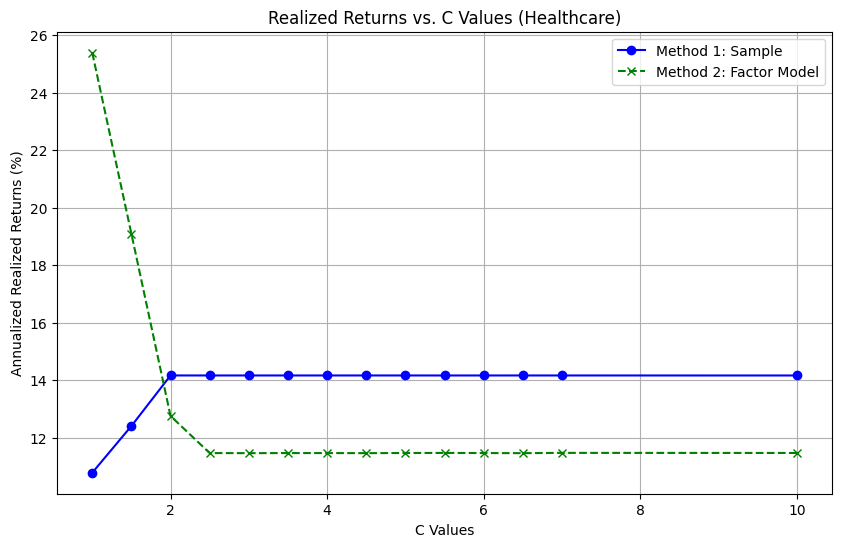

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Realizedreturn, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [Realizedreturn[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Realizedreturn_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('Realized Returns vs. C Values (Healthcare)')
plt.xlabel('C Values')
plt.ylabel('Annualized Realized Returns (%)')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


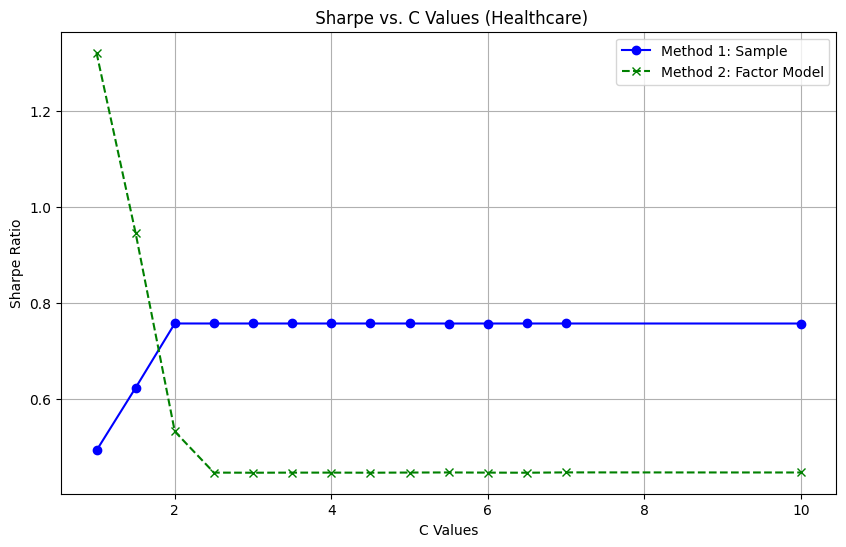

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Sharpe, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [Realizedreturn[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Sharpe_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title(' Sharpe vs. C Values (Healthcare)')
plt.xlabel('C Values')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


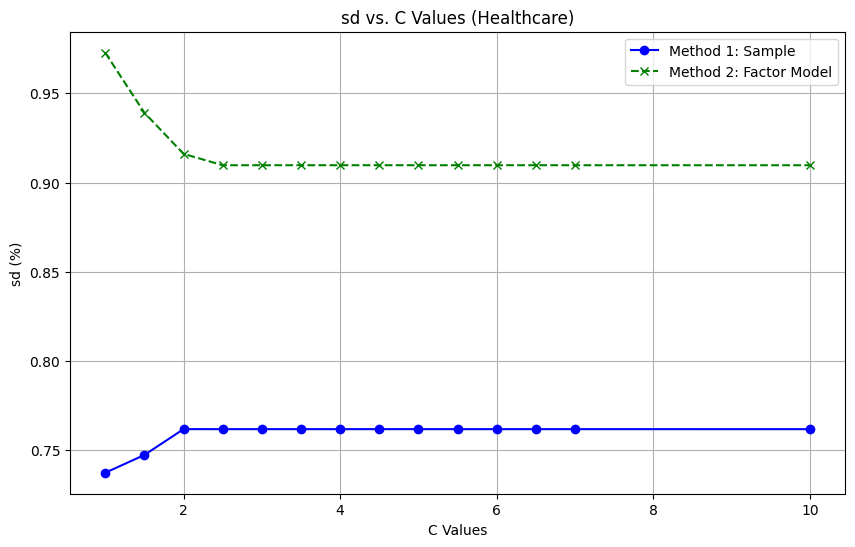

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])

# Corresponding annualized realized returns (in percentage)
import numpy as np



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, SD, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [annualized_returns[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, SD_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('sd vs. C Values (Healthcare)')
plt.xlabel('C Values')
plt.ylabel('sd (%)')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


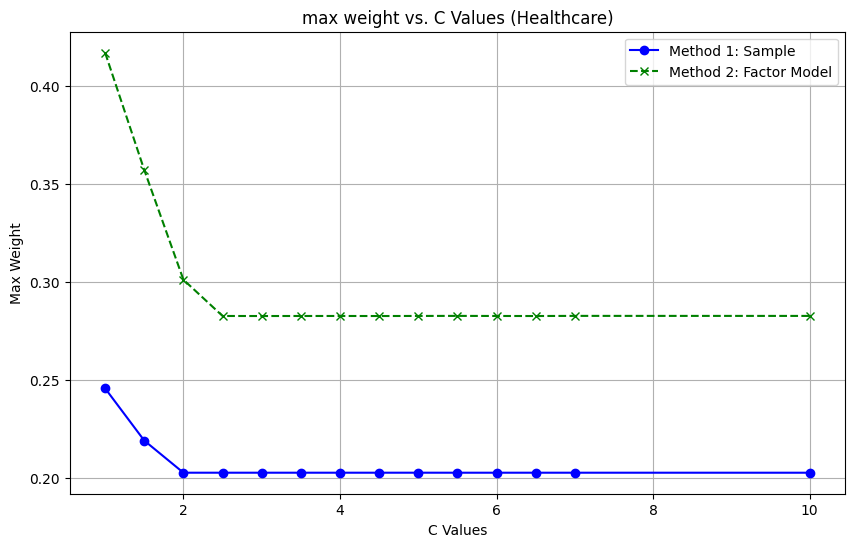

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])

# Corresponding annualized realized returns (in percentage)
import numpy as np


# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Max, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [annualized_returns[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Max_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('max weight vs. C Values (Healthcare)')
plt.xlabel('C Values')
plt.ylabel('Max Weight')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()
